In [1]:
from keras.datasets import imdb
(train_data,train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
import keras
keras.__version__

'2.2.4'

In [3]:
import tensorflow as tf
tf.__version__

'1.8.0'

In [0]:
train_data[0]

In [5]:
train_labels[0]

1

In [8]:
max(max(sequence) for sequence in train_data)

9999

In [10]:
# 将某条评论解码为英文单词
#word_index是将单词-->索引 的字典
word_index = imdb.get_word_index()
reverse_word_index = dict([
    (value,key) for (key,value) in word_index.items()
])
decoded_review = ' '.join([
    reverse_word_index.get(i-3, '?') for i in train_data[0]
])
# 索引-3： 0：'padding'; 1:序列开始； 2:'unknown'
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

不能直接把整数list输入NN，必须先转成Tensor

转换方法：

1. 填充list，使它具有相同长度 ，然后，list转化成(samples, word_indices)的整数tensor，然后，NN第一层用Embedding层，处理这种tensor

2. 对list进行one-hot 编码，转成0，1向量，然后NN第一层可以使用Dense层

In [0]:
'''
采用第二种one-hot方法
将整数list编码成二进制矩阵
'''

import numpy as np

'''
创建形状为(len(sequences),dimension)的0矩阵
'''
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] =1.#将results[i]的指定索引设为1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
x_train[0]

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

In [0]:
#将标签向量化
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
'''
构建网络

输入是array，输出是标量，可以使用带relu激活的Dense层
'''

#模型定义
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

为什么使用激活函数？
1. 如果没有非线性，假设空间就是所有的线性变换
2. 但是这样的假设空间就很有限，不嫩利用多个表示层的优势，多层仍是线性仿射变换，不会扩展假设空间
3. 机器学习就是要在假设空间里面进行训练迭代，激活函数可以充分扩展假设空间，充分利用多层表示的优势

In [0]:
'''
模型编译
'''
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy']
             )
'''
当需要配置自定义的优化器参数，或者自定义传入的损失函数和指标函数时，
可以向optimizer参数传入一个优化器类的实例来实现，
或者，loss和metrics参数传入函数对象
'''
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy]
             )


In [0]:
'''
留出验证集val
'''
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [20]:
'''
训练模型
'''
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=50,
                   batch_size=512,
                   validation_data=(x_val, y_val)
                   )

Train on 15000 samples, validate on 10000 samples
Epoch 1/50
15000/15000 [==============================] - 2s 138us/step - loss: 0.5048 - binary_accuracy: 0.7872 - val_loss: 0.3774 - val_binary_accuracy: 0.8704
Epoch 2/50
15000/15000 [==============================] - 2s 124us/step - loss: 0.2991 - binary_accuracy: 0.9048 - val_loss: 0.3001 - val_binary_accuracy: 0.8898
Epoch 3/50
15000/15000 [==============================] - 2s 124us/step - loss: 0.2173 - binary_accuracy: 0.9283 - val_loss: 0.3082 - val_binary_accuracy: 0.8716
Epoch 4/50
15000/15000 [==============================] - 2s 121us/step - loss: 0.1747 - binary_accuracy: 0.9440 - val_loss: 0.2826 - val_binary_accuracy: 0.8843
Epoch 5/50
15000/15000 [==============================] - 2s 121us/step - loss: 0.1422 - binary_accuracy: 0.9539 - val_loss: 0.2855 - val_binary_accuracy: 0.8855
Epoch 6/50
15000/15000 [==============================] - 2s 121us/step - loss: 0.1148 - binary_accuracy: 0.9652 - val_loss: 0.3134 - val_bi

In [21]:
'''
history对象有一个history成员，它是一个字典，包含有训练过程中的所有数据
'''
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

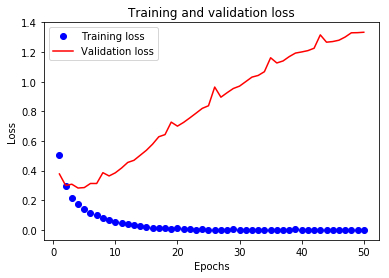

In [23]:
'''
绘制 训练损失，和验证损失
'''
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

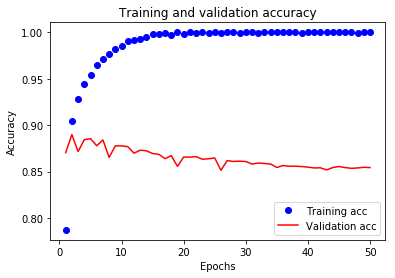

In [24]:
'''
绘制 训练精度 和 验证精度
'''
plt.clf()  #清空图像
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

验证集的损失和精度在第四轮左右达到最优，所以，已经出现了**过拟合**

下面，从头开始训练一个模型，使他在第四轮停止，然后在测试集测试

In [27]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy]
             )

history = model.fit(x_train,
                   y_train,
                   epochs=4,
                   batch_size=512,
                   )

results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 91us/step - loss: 0.4686 - binary_accuracy: 0.8219
Epoch 2/4
25000/25000 [==============================] - 2s 86us/step - loss: 0.2708 - binary_accuracy: 0.9075
Epoch 3/4
25000/25000 [==============================] - 2s 87us/step - loss: 0.2078 - binary_accuracy: 0.9258
Epoch 4/4
25000/25000 [==============================] - 2s 61us/step


In [28]:
results

[0.28785432773590086, 0.88456000000000001]

In [29]:
'''
训练好之后，用于预测
使用predict犯法得到的是为正面的可能性的大小
'''
model.predict(x_test)

array([[ 0.23300742],
       [ 0.99962866],
       [ 0.89790207],
       ..., 
       [ 0.15598357],
       [ 0.08122449],
       [ 0.61522961]], dtype=float32)